<a href="https://colab.research.google.com/github/neerajthandayan/Tensorflow-2.0/blob/main/Convolutional%20Neural%20Networks/CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout

In [2]:
# Fetching data
data = tf.keras.datasets.fashion_mnist

(C_train,d_train), (C_test,d_test) = data.load_data()
C_train, C_test = C_train/255, C_test/255

In [3]:
# Checking data dimensions

print(C_train.shape)

(60000, 28, 28)


In [4]:
# Expandind data dimensions for convolution

C_train = np.expand_dims(C_train, -1)
C_test = np.expand_dims(C_test, -1)

In [5]:
# Altered Shape

C_train.shape

(60000, 28, 28, 1)

In [6]:
# Fetching the number of classes

K = len(set(d_train))
print(f"Number of Classes: {K}")

Number of Classes: 10


In [7]:
C_train[0].shape

(28, 28, 1)

In [9]:
# Construction model
# Standardised coding style (using functional API)

i = Input(shape=C_train[0].shape)
x = Conv2D(32, (3,3), strides=2,activation=tf.keras.layers.LeakyReLU())(i)
x = Conv2D(64, (3,3), strides=2,activation=tf.keras.layers.LeakyReLU())(x)
x = Conv2D(128, (3,3), strides=2,activation=tf.keras.layers.LeakyReLU())(x)
x = Flatten()(x)
x = Dropout(0.1)(x)
x = Dense(512, activation=tf.keras.layers.LeakyReLU())(x)
x = Dropout(0.1)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [10]:
# Compiling model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

result = model.fit(C_train, d_train, validation_data=(C_test,d_test), epochs=25)

Epoch 1/25
1875/1875 [==============================] - 31s 16ms/step - loss: 0.6516 - accuracy: 0.7610 - val_loss: 0.4112 - val_accuracy: 0.8496
Epoch 2/25
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3790 - accuracy: 0.8593 - val_loss: 0.3651 - val_accuracy: 0.8645
Epoch 3/25
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3307 - accuracy: 0.8761 - val_loss: 0.3635 - val_accuracy: 0.8692
Epoch 4/25
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3053 - accuracy: 0.8837 - val_loss: 0.3510 - val_accuracy: 0.8755
Epoch 5/25
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2903 - accuracy: 0.8919 - val_loss: 0.3633 - val_accuracy: 0.8726
Epoch 6/25
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2706 - accuracy: 0.8972 - val_loss: 0.3327 - val_accuracy: 0.8826
Epoch 7/25
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2549 - accuracy: 0.9031 - val_loss: 0.3190 -

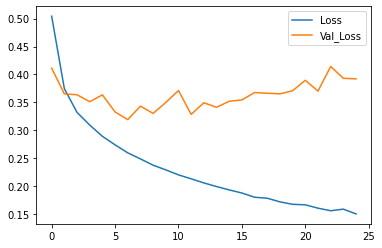

In [11]:
# Plotting Loss

plt.plot(result.history['loss'], label='Loss')
plt.plot(result.history['val_loss'], label='Val_Loss')
plt.legend()

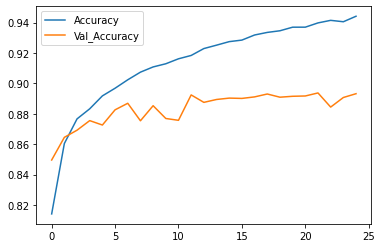

In [12]:
# Plotting Accuracy

plt.plot(result.history['accuracy'], label='Accuracy')
plt.plot(result.history['val_accuracy'], label='Val_Accuracy')
plt.legend()

Confusion matrix, without normalization
[[847   0  28  10   4   2 105   0   4   0]
 [  2 971   1  16   6   0   4   0   0   0]
 [ 21   0 851   7  53   0  65   0   2   1]
 [ 25   9  27 876  23   1  39   0   0   0]
 [  0   1  72  27 813   0  87   0   0   0]
 [  1   0   0   1   0 975   0  18   0   5]
 [113   0  76  17  64   0 725   0   5   0]
 [  0   0   0   0   0  15   0 955   0  30]
 [  3   1   9   2   4   2   8   4 967   0]
 [  1   0   0   0   0   7   0  40   0 952]]


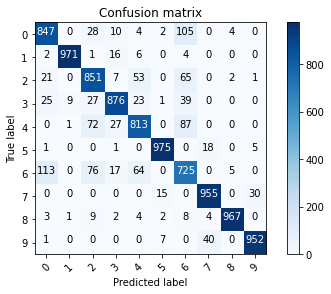

In [13]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(C_test).argmax(axis=1)
cm = confusion_matrix(d_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [14]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

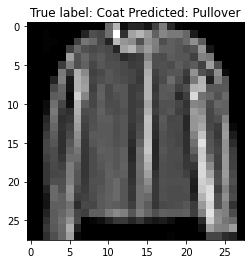

In [19]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != d_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(C_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[d_test[i]], labels[p_test[i]]));